In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

# Classify few genres to class "Others"

In [3]:
genresDic = read_json('genresDic.json')
len(genresDic)

97

In [4]:
others = ['Western', 'Documentary', 'War', 'History', 'Family', 'Sport', 'Music'] # 7 classes

In [6]:
genres = ['Biography',
         'Animation',
         'Sci-Fi',
         'Fantasy',
         'Romance',
         'Crime',
         'Mystery',
         'Horror',
         'Thriller',
         'Action',
         'Adventure',
         'Comedy',
         'Drama',
         'Others'] # 14 classes

In [5]:
for key, value in genresDic.items():
    print(key, value)
    other = False
    
    li = value.copy()
    for v in li:
        if not v in genres:
            other = True
            value.remove(v)
    
    if other:
        value.append('Others')
    print(key, value)
    print('============================================================')

detectivepikachumovie ['Action', 'Adventure', 'Comedy']
detectivepikachumovie ['Action', 'Adventure', 'Comedy']
captainmarvelofficial ['Action', 'Adventure', 'Sci-Fi']
captainmarvelofficial ['Action', 'Adventure', 'Sci-Fi']
bernadettefilm ['Comedy', 'Drama', 'Mystery']
bernadettefilm ['Comedy', 'Drama', 'Mystery']
godzillamovie ['Action', 'Adventure', 'Fantasy']
godzillamovie ['Action', 'Adventure', 'Fantasy']
glassmovie ['Drama', 'Sci-Fi', 'Thriller']
glassmovie ['Drama', 'Sci-Fi', 'Thriller']
thefarewell ['Comedy', 'Drama']
thefarewell ['Comedy', 'Drama']
beachbummovie ['Comedy']
beachbummovie ['Comedy']
thesunisalsoastar ['Drama', 'Romance']
thesunisalsoastar ['Drama', 'Romance']
arcticmovie ['Adventure', 'Drama']
arcticmovie ['Adventure', 'Drama']
angrybirdsmovie ['Adventure', 'Animation', 'Comedy']
angrybirdsmovie ['Adventure', 'Animation', 'Comedy']
johnwickmovie ['Action', 'Crime', 'Thriller']
johnwickmovie ['Action', 'Crime', 'Thriller']
captivestatemovie ['Drama', 'Sci-Fi', 'T

In [7]:
# Save 14 classes dict
write_json(genresDic, './newGenresDic.json')

# One hot encode genres

In [8]:
# load new genres
genresDic = read_json('./newGenresDic.json')
print(len(genresDic))

97


In [9]:
genresMat = {}
for acc, value in genresDic.items():
    gs = genresDic[acc]
    print(acc, gs)
    glist = []
    for g in genres:
        if g in gs:
            glist.append(1)
        else:
            glist.append(0)
            
    genresMat[acc] = glist

annamovie ['Action', 'Thriller']
hotelmumbaifilm ['Drama', 'Thriller', 'Others']
detectivepikachumovie ['Action', 'Adventure', 'Comedy']
captainmarvelofficial ['Action', 'Adventure', 'Sci-Fi']
bernadettefilm ['Comedy', 'Drama', 'Mystery']
godzillamovie ['Action', 'Adventure', 'Fantasy']
glassmovie ['Drama', 'Sci-Fi', 'Thriller']
thefarewell ['Comedy', 'Drama']
beachbummovie ['Comedy']
thesunisalsoastar ['Drama', 'Romance']
arcticmovie ['Adventure', 'Drama']
thelegomovie ['Action', 'Adventure', 'Animation']
angrybirdsmovie ['Adventure', 'Animation', 'Comedy']
johnwickmovie ['Action', 'Crime', 'Thriller']
captivestatemovie ['Drama', 'Sci-Fi', 'Thriller']
booksmart ['Comedy']
missbalamovie ['Action', 'Crime', 'Drama']
escaperoom ['Action', 'Adventure', 'Horror']
annabellemovie ['Horror', 'Mystery', 'Thriller']
lalloronamovie ['Horror', 'Mystery', 'Thriller']
theupsidefilm ['Comedy', 'Drama']
petsematarymovie ['Horror', 'Mystery', 'Thriller']
47metersdown ['Adventure', 'Drama', 'Horror']
t

In [10]:
genresMat

{'47metersdown': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 'adogsjourneymovie': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 'aftermathmovie': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 'aftermovie': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'alitamovie': [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 'angelhasfallen': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 'angrybirdsmovie': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 'annabellemovie': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 'annamovie': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 'apollo11movie': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 'arcticmovie': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 'artofracingmovie': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 'avengers': [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 'beachbummovie': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'bernadettefilm': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 'blindedbythelightmovie': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 'bo

In [11]:
write_json(genresMat, './genresMat.json')

In [12]:
li = []
for key, v in genresMat.items():
    li.append([key] + v)

In [13]:
df=pd.DataFrame(li, columns = ['movie'] + genres)
df = df.sort_values(by = 'movie')

In [14]:
# save on hot encoded genre
df.to_csv('./movieGenre_onehot.csv', index = False)

# Extract all img and cover in posts

## Copy from Post/ to IGimg/

In [15]:
genresMat = read_json('./genresMat.json')

In [16]:
PATH = '../Posts/'
IG_IMG = './IGimg/'
newPath(IG_IMG)

In [17]:
li = []
for folder in os.listdir(PATH):
    print(folder)
    postList = os.listdir(PATH + folder) # all posts for each account
    length = len(postList)
    i = 0
    for postID in postList:
        postPath = PATH + folder + '/' + postID + '/'
        post = read_json(postPath + 'post.json')
        writeProgress('Progress:', i, length)
        
        if post['media_type'] in [1, 8]:
            for file in os.listdir(postPath):
                if 'img' in file:
                    src = postPath + file
                    dst = IG_IMG + '/'
                    count = len(os.listdir(dst))
                    name = folder + '_' + str(count) + '.jpg'
                    shutil.copy(src, dst + name)
                    li.append([name] + genresMat[folder])
                    
        elif post['media_type'] == 2:
            for file in os.listdir(postPath):
                if 'img' in file:
                    src = postPath + file
                    dst = IG_IMG + '/'
                    count = len(os.listdir(dst))
                    name = folder + '_' + str(count) + '.jpg'
                    shutil.copy(src, dst + name)
                    li.append([name] + genresMat[folder])
                    
        else:
            print('Unknown media_type', post['media_type'])
            
        i += 1

47metersdown
adogsjourneymovie
aftermathmovie%
aftermovie8.04%
alitamovie7.30%
angelhasfallen%
angrybirdsmovie
annabellemovie%
annamovie99.69%
apollo11movie2%
arcticmovie.17%
artofracingmovie
avengers:98.73%
beachbummovie2%
bernadettefilm%
blindedbythelightmovie
booksmart98.67%
breakthroughmovie
brianbanksmovie
brightburnmovie
brittanyrunsmov
captainmarvelofficial
captivestatemovie
childsplaymovie
clarathefilm17%
coldpursuitmovie
detectivepikachumovie
disneyaladdin9%
doramovie99.35%
dumboess:97.56%
escaperoom9.12%
everybodyknowsmovie
fastandfuriousmovie
fightingwmyfam%
fivefeetapartfilm
glassmovie9.33%
gloriabellmovie
godzillamovie7%
goodboysmovie3%
gretafilm97.92%
happydeathdaymovie
hellboymovie43%
hersmellmovie0%
highlifemovie8%
hotelmumbaifilm
httydragon8.18%
hustlemovie.67%
isntitromantic%
johnwickmovie5%
lalloronamovie%
lastblackmansf%
latenightmovie%
lionking:99.19%
littlethemovie%
littlewoodsfilm
longshotmovie7%
mamovie2019.67%
meninblack9.01%
midsommarmovie%
missbalamovie1%
mis

## Filename to genre matrix dataframe

In [18]:
df=pd.DataFrame(li, columns = ['filename'] + genres)
df

,filename,Biography,Animation,Sci-Fi,Fantasy,Romance,Crime,Mystery,Horror,Thriller,Action,Adventure,Comedy,Drama,Others
0,47metersdown_0.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,47metersdown_1.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,47metersdown_2.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,47metersdown_3.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,47metersdown_4.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
5,47metersdown_5.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
6,47metersdown_6.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
7,47metersdown_7.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
8,47metersdown_8.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0
9,47metersdown_9.jpg,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [19]:
df.to_csv('./fileGenreMatrix.csv', index = 0)

## Count the number for each genre

In [20]:
genreCount = pd.DataFrame(df.sum(axis = 0), columns = ['count'])
genreCount = genreCount.drop('filename')

In [21]:
genreCount = genreCount.sort_values(by = 'count', ascending = True)
genreCount

,count
Romance,1137
Biography,1187
Crime,1375
Fantasy,1520
Mystery,1863
Others,1870
Horror,2104
Thriller,2314
Animation,3285
Sci-Fi,4447


# Select train and test part

In [22]:
# init 
total = {}
for g in genreCount.index:
    total[g] = 0
print(total)
df = pd.read_csv('./fileGenreMatrix.csv')
print(df.shape)

{'Romance': 0, 'Drama': 0, 'Thriller': 0, 'Crime': 0, 'Sci-Fi': 0, 'Others': 0, 'Action': 0, 'Animation': 0, 'Fantasy': 0, 'Biography': 0, 'Horror': 0, 'Comedy': 0, 'Adventure': 0, 'Mystery': 0}
(18935, 15)


In [23]:
from IPython.display import display
trainingset = pd.DataFrame()
testingset = pd.DataFrame()
for g, row in genreCount.iterrows():
    print('current DF:', df.shape)
    print(g)
    
    remain = 500 - total[g]
    
    newdf = df.loc[df[g] == 1]
    df = df.drop(newdf.index)
    print(newdf.shape)
#     display(newdf)
    
    try:
        traindf = newdf.sample(n = remain)
    except ValueError:
        testingset = testingset.append(newdf)
        continue
#     display(traindf)

    print(traindf.shape)
    trainingset = trainingset.append(traindf)
    testingset = testingset.append(newdf.drop(traindf.index))
    
    countdf = pd.DataFrame(traindf.sum(axis = 0), columns = ['count']).drop('filename')
#     display(countdf)
    
    for genre, row in countdf.iterrows():
        total[genre] += row['count']
        
    print(total)
    
    print('==================================================')

current DF: (18935, 15)
Romance
(1137, 15)
(500, 15)
{'Romance': 500, 'Drama': 250, 'Thriller': 0, 'Crime': 0, 'Sci-Fi': 0, 'Others': 27, 'Action': 0, 'Animation': 0, 'Fantasy': 212, 'Biography': 0, 'Horror': 0, 'Comedy': 322, 'Adventure': 0, 'Mystery': 0}
current DF: (17798, 15)
Biography
(1187, 15)
(500, 15)
{'Romance': 500, 'Drama': 750, 'Thriller': 0, 'Crime': 0, 'Sci-Fi': 0, 'Others': 210, 'Action': 0, 'Animation': 0, 'Fantasy': 212, 'Biography': 500, 'Horror': 0, 'Comedy': 405, 'Adventure': 0, 'Mystery': 0}
current DF: (16611, 15)
Crime
(1375, 15)
(500, 15)
{'Romance': 500, 'Drama': 910, 'Thriller': 133, 'Crime': 500, 'Sci-Fi': 0, 'Others': 225, 'Action': 353, 'Animation': 0, 'Fantasy': 212, 'Biography': 500, 'Horror': 0, 'Comedy': 589, 'Adventure': 29, 'Mystery': 41}
current DF: (15236, 15)
Fantasy
(1046, 15)
(288, 15)
{'Romance': 500, 'Drama': 910, 'Thriller': 133, 'Crime': 500, 'Sci-Fi': 0, 'Others': 377, 'Action': 457, 'Animation': 0, 'Fantasy': 500, 'Biography': 500, 'Horror

In [24]:
total

{'Action': 1014,
 'Adventure': 1223,
 'Animation': 500,
 'Biography': 500,
 'Comedy': 1192,
 'Crime': 500,
 'Drama': 1222,
 'Fantasy': 500,
 'Horror': 500,
 'Mystery': 500,
 'Others': 500,
 'Romance': 500,
 'Sci-Fi': 500,
 'Thriller': 500}

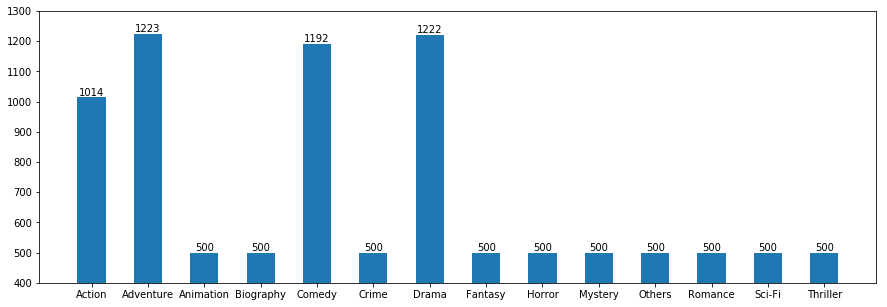

In [29]:
import matplotlib.pyplot as plt

names = list(total.keys())
values = list(total.values())

plt.figure(figsize=(15, 5))
plt.ylim(400, 1300) 
plt.bar(names, values, align='center', width=0.5)

for a,b in zip(names, values):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
    
plt.show()

In [26]:
trainingset.to_csv('./Sample/input_df/trainMatrix.csv', index = 0)
trainingset

,filename,Biography,Animation,Sci-Fi,Fantasy,Romance,Crime,Mystery,Horror,Thriller,Action,Adventure,Comedy,Drama,Others
15031,thesunisalsoastar_15031.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,0
15133,thesunisalsoastar_15133.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2041,artofracingmovie_2041.jpg,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2070,artofracingmovie_2070.jpg,0,0,0,0,1,0,0,0,0,0,0,1,1,0
10034,longshotmovie_10034.jpg,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8798,isntitromantic_8798.jpg,0,0,0,1,1,0,0,0,0,0,0,1,0,0
9997,longshotmovie_9997.jpg,0,0,0,0,1,0,0,0,0,0,0,1,0,0
15084,thesunisalsoastar_15084.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2088,artofracingmovie_2088.jpg,0,0,0,0,1,0,0,0,0,0,0,1,1,0
8787,isntitromantic_8787.jpg,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [27]:
testingset.to_csv('./Sample/input_df/testMatrix.csv', index = 0)
testingset

,filename,Biography,Animation,Sci-Fi,Fantasy,Romance,Crime,Mystery,Horror,Thriller,Action,Adventure,Comedy,Drama,Others
326,aftermathmovie_326.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
328,aftermathmovie_328.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
329,aftermathmovie_329.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
331,aftermathmovie_331.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
332,aftermathmovie_332.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
333,aftermathmovie_333.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
335,aftermathmovie_335.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
337,aftermathmovie_337.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
339,aftermathmovie_339.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
341,aftermathmovie_341.jpg,0,0,0,0,1,0,0,0,0,0,0,0,1,1
